# Learning Curves (Classification)

This notebook overlays learning curves for multiple classification models using validation performance only.

In [1]:
import cuanalytics as ca
import pandas as pd


In [2]:
df_cls = ca.load_breast_cancer_data()
df_cls.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


## Learning Curve (Classification)

Overlay learning curves for multiple classifiers using validation performance only.

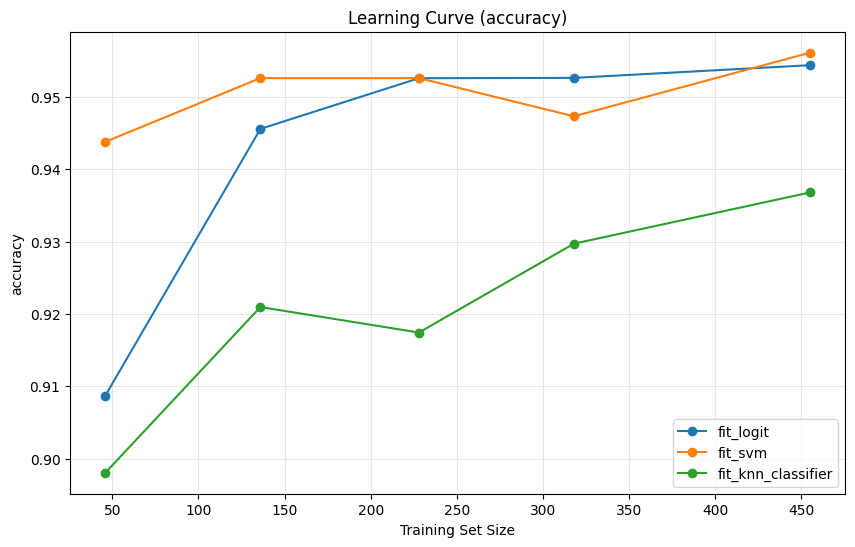

In [3]:
lc_results = ca.plot_learning_curves(
    [ca.fit_logit, ca.fit_svm, ca.fit_knn_classifier],
    df_cls,
    formula='diagnosis ~ .',
    train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],
    k=5,
    stratify_on='diagnosis',
    metric='accuracy',
    verbose=False,
)


## Learning Curve (Single Model)

When plotting a single model, the shaded band shows ±1 standard deviation across folds.

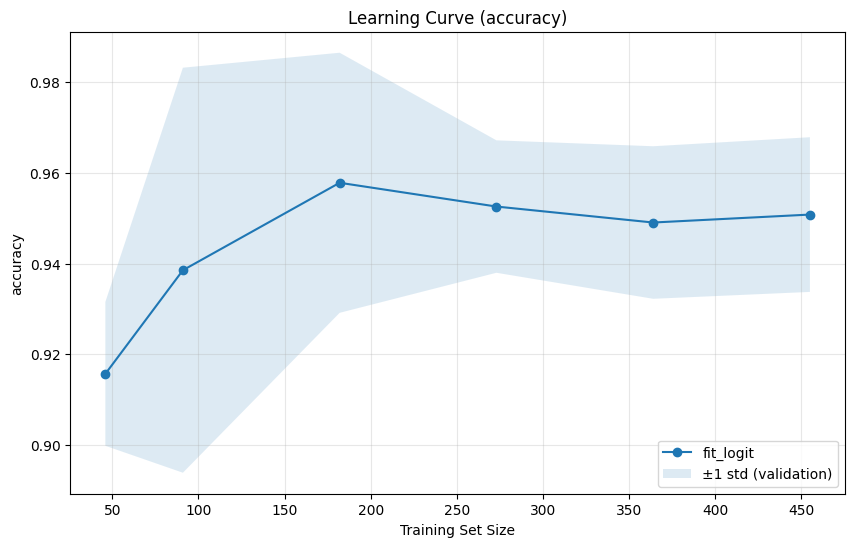

In [6]:
lc_single = ca.plot_learning_curves(
    ca.fit_logit,
    df_cls,
    formula='diagnosis ~ .',
    # train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],
    k=5,
    stratify_on='diagnosis',
    metric='accuracy',
    verbose=False,
)
